# PCA ON MNIST DATASET

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


mnist=pd.read_csv('../mnist_train.csv')

lables=mnist["label"]

data=mnist.drop('label',axis=1)

print(data.shape)
print(lables.shape)



(42000, 784)
(42000,)


# Data pre processing

In [4]:


from sklearn.preprocessing import StandardScaler
#Standardize the data
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)


(42000, 784)


# get the co variance matrix

In [5]:


import numpy as np

covar_matrix= np.matmul(standardized_data.T,standardized_data)

print(covar_matrix.shape)

(784, 784)


# get the eigen values and vectors

In [6]:


from scipy.linalg  import eigh

values,vectors=eigh(covar_matrix,eigvals=(782,783))

print(vectors.shape)
vectors = vectors.T
print(vectors.shape)

(784, 2)
(2, 784)


In [7]:
new_cordinates = np.matmul(vectors,standardized_data.T)
print(new_cordinates.shape)
new_cordinates =np.vstack((new_cordinates,lables)).T
print(new_cordinates.shape)

dataframe=pd.DataFrame(data=new_cordinates,columns=("1st_principal","2nd_principal","label"))

(2, 42000)
(42000, 3)


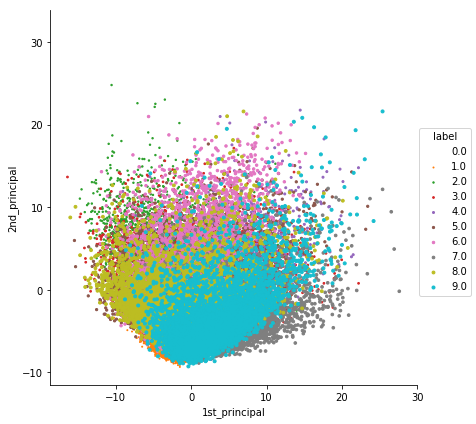

In [8]:
# plotting the 2nd data points with seaborn

import seaborn as sb

sb.FacetGrid(dataframe,hue='label',size=6).map(plt.scatter,'1st_principal','2nd_principal','label').add_legend()

plt.show()

# PCA with default implementation

(42000, 2)


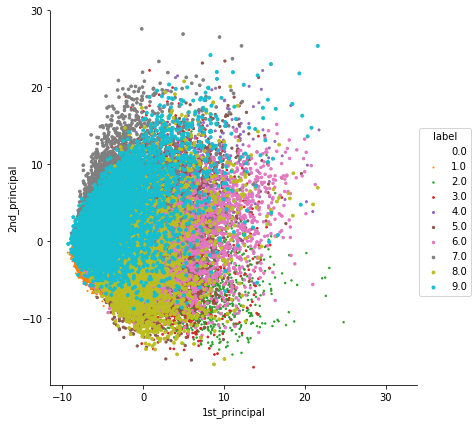

In [9]:
from sklearn import decomposition

pca= decomposition.PCA()

pca.n_components=2
pca_data=pca.fit_transform(standardized_data)
print(pca_data.shape)

pca_data=np.vstack((pca_data.T,lables)).T

pc_df=pd.DataFrame(data=pca_data,columns=("1st_principal","2nd_principal","label"))
sb.FacetGrid(pc_df,hue='label',size=6).map(plt.scatter,'1st_principal','2nd_principal','label').add_legend()
plt.show()